<a href="https://colab.research.google.com/github/Lee-ane/Diagnosis-of-heart-disease/blob/main/nhom11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Đề tài 10: Heart-Cleveland(bệnh tim)

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu bao gồm 303 mẫu từ Heart-Cleveland trong 2 num:
        + 0: No disease(< 50% diameter narrowing).
        + 1: Disease(> 50% diameter narrowing).
+ **Dữ liệu vào**:
    + age
    + sex
    + chest pain type
    + resting blood pressure
    + serum cholestoral in mg/dl
    + fasting blood sugar > 120 mg/dl
    + resting electrocardiographic results
    + maximum heart rate achieved
    + exercise induced angina
    + oldpeak
    + slope
    + number of major vessels colored by flourosopy
    + thal
+ **Kết quả**: diagnosis of heart disease (0 và 1)

#### 1.1 Khai báo dữ liệu

In [ ]:
import os
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import random
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

import sklearn

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import model_selection

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

#### 1.2 Nạp dữ liệu

In [ ]:
data_path  = "data/processed.cleveland.csv"
data_names = ["age",
              "sex",
              "cp",
              "trestbps",
              "chol",
              "fbs",
              "restecg",
              "thalach",
              "exang",
              "oldpeak",
              "slope",
              "ca",
              "thal",
              "num"]
# Set '?' là giá trị NaN
df_dataset = pd.read_csv(data_path, names = data_names, na_values='?')
# Thay giá trị 2,3,4 ở (Attribute) diagnosis of heart disease thành giá trị 1
# Vì giá trị của Class chỉ bao gồm 0: No disease(< 50% diameter narrowing) và 1: Disease(> 50% diameter narrowing).
df_dataset['num']=df_dataset['num'].replace(to_replace=2,value=1)
df_dataset['num']=df_dataset['num'].replace(to_replace=3,value=1)
df_dataset['num']=df_dataset['num'].replace(to_replace=4,value=1)

### 2. Phân tích dữ liệu (Analyze Data)

#### 2.1 Thống kê mô tả ( Descriptive Statistics )

+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# shape
print(f'+ Shape: {df_dataset.shape}')

# types
print(f'+ Data Types: \n{df_dataset.dtypes}')

# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))

# info
df_dataset.info()

+ Shape: (303, 14)
+ Data Types: 
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object
+ Contents: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


**Nhận xét**:
+ Dữ liệu có 14 tính chất để phân lớp:
              age,
              sex,
              chest pain type,
              resting blood pressure,
              serum cholestoral in mg/dl,
              fasting blood sugar > 120 mg/dl,
              resting electrocardiographic results,
              maximum heart rate achieved,
              exercise induced angina,
              ST depression induced by exercise relative to rest,
              the slope of the peak exercise ST segment,
              number of major vessels colored by flourosopy,
              thal,
              diagnosis of heart disease.
+ Tổng số dòng dữ liệu là 303 dòng.
+ Dữ liệu để phân lớp ở cột diagnosis of heart disease.

#### Thống kê tỉ lệ giới tính

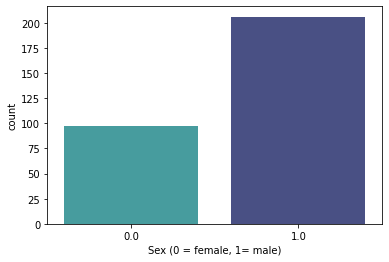

In [ ]:
sns.countplot(x='sex', data=df_dataset, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

<AxesSubplot:ylabel='sex'>

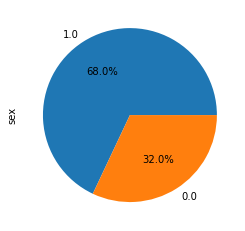

In [ ]:
df_dataset['sex'].value_counts().plot.pie(autopct="%1.1f%%")

**Nhận xét:**
+ Dư liệu ở thuộc tính sex(giới tính):
    + 0 (nữ) có số lượng  : 97 chiếm 32%
    + 1 (nam) có số lượng : 206 chiếm 68%

#### Biểu đồ phân class(num) dựa trên độ tuổi(age) và nhịp tim tối đa (thalach)

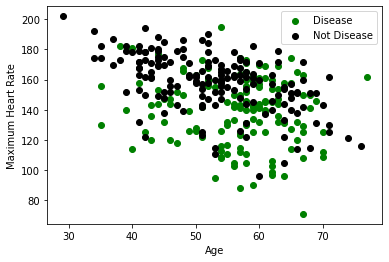

In [ ]:
plt.scatter(x=df_dataset.age[df_dataset.num==1], y=df_dataset.thalach[(df_dataset.num==1)], c="green")
plt.scatter(x=df_dataset.age[df_dataset.num==0], y=df_dataset.thalach[(df_dataset.num==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

##### 2. Kiểm tra tính toàn vẹn của dữ liệu

In [ ]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


+ Có giá trị Nan: True


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


+ Số dòng trùng: 0


##### 3.Tính phần trăm số dòng bị thiếu

,Total,Percent
ca,4,0.013201
thal,2,0.006601
age,0,0.000000
sex,0,0.000000
cp,0,0.000000


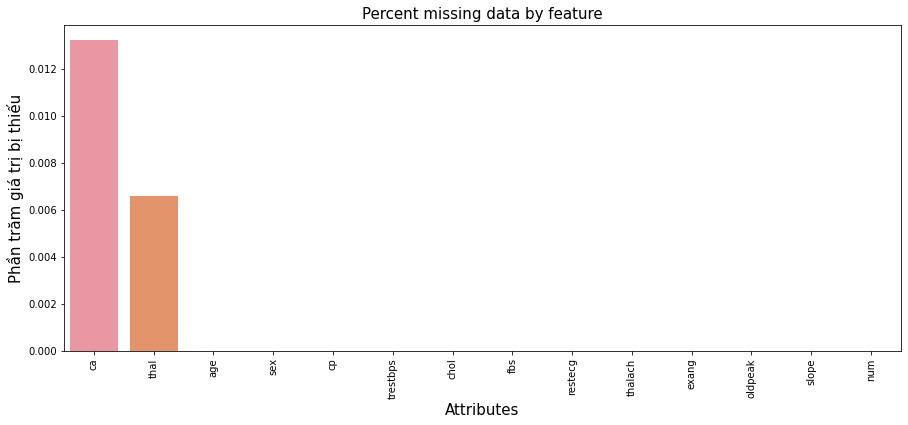

In [ ]:
total = df_dataset.isnull().sum().sort_values(ascending=False)
percent = (df_dataset.isnull().sum()/df_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Phần trăm giá trị bị thiếu', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

**Nhận xét**:
+ Dữ liệu có 6 giá trị không hợp lệ (Nan, Null).
+ Dữ liệu có 0.2% giá trị là rỗng.
+ Dữ liệu không có giá trị trùng.

##### 4. Các tính chất thống kê trên dữ liệu số
+ Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.

In [ ]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

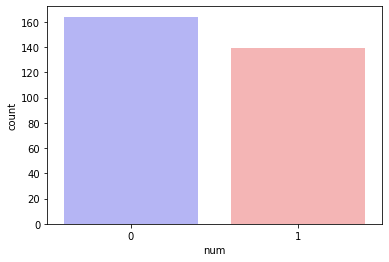

In [ ]:
sns.countplot(x="num", data=df_dataset, palette="bwr")
plt.show()

In [ ]:
df_dataset["num"].value_counts()

0    164
1    139
Name: num, dtype: int64

**Nhận xét**:
+ Dữ liệu cần phân loại 2 lớp: 0 và 1.
+ Các lớp không cân bằng:
       0 (< 50% diameter narrowing) số lượng là: 164
       1 (> 50% diameter narrowing) số lượng là: 139

##### 5. Mỗi tương quan giữa các tính chất ( Corelations )

In [ ]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (age, cp) = 0.104
    + (age, trestbps) = 0.285
    + (age, chol) = 0.209
    + (age, fbs) = 0.119
    + (age, restecg) = 0.149
    + (age, exang) = 0.092
    + (age, oldpeak) = 0.204
    + (age, slope) = 0.162
    + (age, num) = 0.223
    + (sex, cp) = 0.010
    + (sex, fbs) = 0.048
    + (sex, restecg) = 0.022
    + (sex, exang) = 0.146
    + (sex, oldpeak) = 0.102
    + (sex, slope) = 0.038
    + (sex, num) = 0.277
    + (cp, chol) = 0.072
    + (cp, restecg) = 0.068
    + (cp, exang) = 0.384
    + (cp, oldpeak) = 0.202
    + (cp, slope) = 0.152
    + (sp, num) = 0.414
    + (trestdps, chol) = 0.130
    + (trestdps, fbs) = 0.175
    + (trestdps, restecg) = 0.147
    + (trestdps, exang) = 0.065
    + (trestdps, oldpeak) = 0.189
    + (trestdps, slope) = 0.117
    + (trestdps, num) = 0.151
    + (chol, fbs) = 0.0098
    + (chol, restecg) = 0.171
    + (chol, exang) = 0.061
    + (chol, oldpeak) = 0.047
    + (chol, num) = 0.085
    + (fbs, restecg) = 0.0696
    + (fbs, exang) = 0.026
    + (fbs, oldpeak) = 0.006
    + (fbs, slope) = 0.0599
    + (fbs, num) = 0.025
    + (restecg, exang) = 0.085
    + (restecg, oldpeak) = 0.114
    + (restecg, slope) = 0.134
    + (restecg, num) = 0.169
    + (exang, oldpeak) = 0.288
    + (exang, slope) = 0.258
    + (exang, num) = 0.432
    + (oldpeak, slope) = 0.578
    + (oldpeak, num) = 0.425
    + (slope, num) = 0.339

#### 2.2 Hiển thị dữ liệu ( Visualize Data )

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

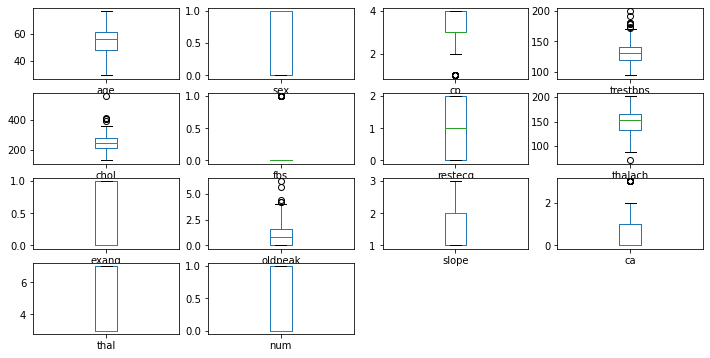

In [ ]:
df_dataset.plot(kind="box", subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(12,6));

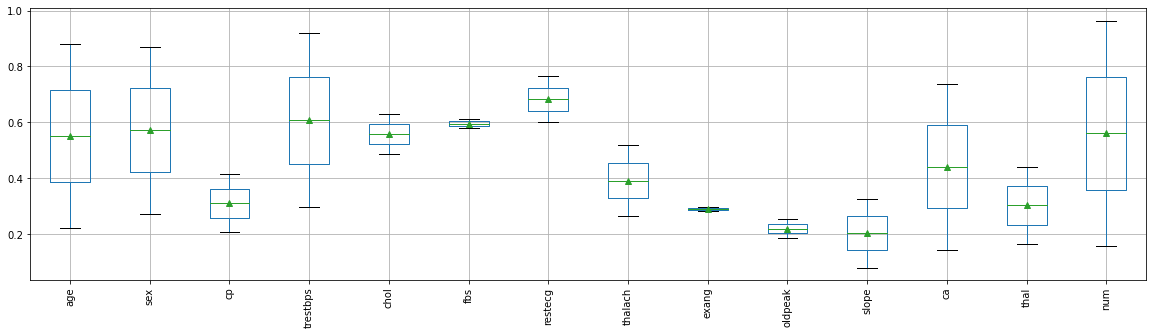

In [ ]:
np.random.seed(5)
cols = ["age",
        "sex",
        "cp",
        "trestbps",
        "chol",
        "fbs",
        "restecg",
        "thalach",
        "exang",
        "oldpeak",
        "slope",
        "ca",
        "thal",
        "num"]
df_dataset = pd.DataFrame(np.random.rand(2, 14), columns=cols)
df_dataset.boxplot(column=cols, rot=90, figsize=(20,5),showmeans=True)
boxprops = dict(linestyle='-', linewidth=3, color='k')

**Biểu đồ Histogram**

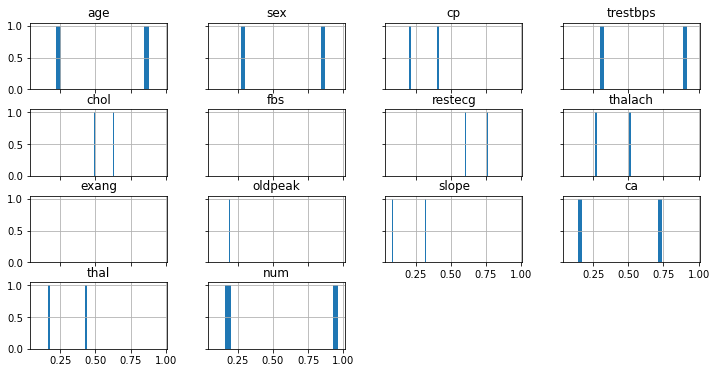

In [ ]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

<AxesSubplot:>

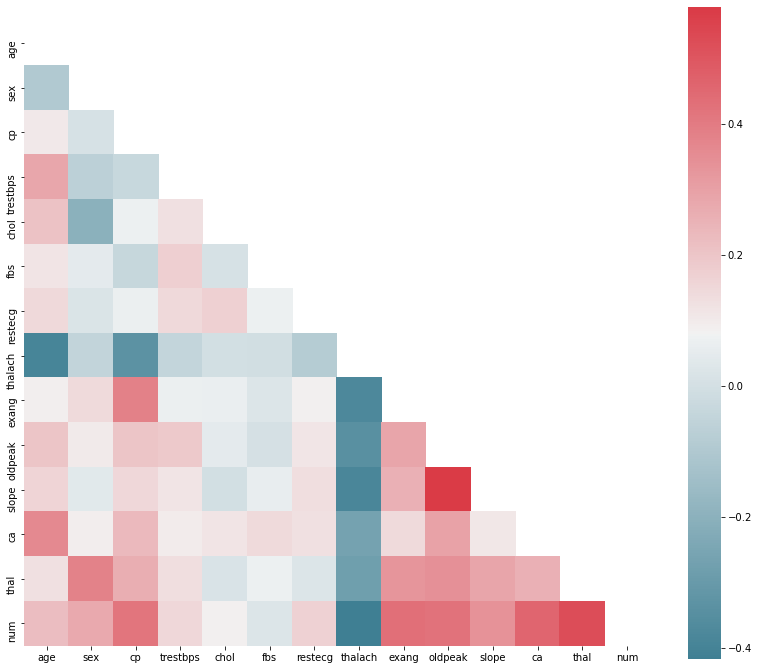

In [ ]:
df = pd.DataFrame(df_dataset)
f, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask = mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [ ]:
correlations.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (age, cp) = 0.104
    + (age, trestbps) = 0.285
    + (age, chol) = 0.209
    + (age, fbs) = 0.119
    + (age, restecg) = 0.149
    + (age, exang) = 0.092
    + (age, oldpeak) = 0.204
    + (age, slope) = 0.162
    + (age, num) = 0.223
    + (sex, cp) = 0.010
    + (sex, fbs) = 0.048
    + (sex, restecg) = 0.022
    + (sex, exang) = 0.146
    + (sex, oldpeak) = 0.102
    + (sex, slope) = 0.038
    + (sex, num) = 0.277
    + (cp, chol) = 0.072
    + (cp, restecg) = 0.068
    + (cp, exang) = 0.384
    + (cp, oldpeak) = 0.202
    + (cp, slope) = 0.152
    + (sp, num) = 0.414
    + (trestdps, chol) = 0.130
    + (trestdps, fbs) = 0.175
    + (trestdps, restecg) = 0.147
    + (trestdps, exang) = 0.065
    + (trestdps, oldpeak) = 0.189
    + (trestdps, slope) = 0.117
    + (trestdps, num) = 0.151
    + (chol, fbs) = 0.0098
    + (chol, restecg) = 0.171
    + (chol, exang) = 0.061
    + (chol, oldpeak) = 0.047
    + (chol, num) = 0.085
    + (fbs, restecg) = 0.0696
    + (fbs, exang) = 0.026
    + (fbs, oldpeak) = 0.006
    + (fbs, slope) = 0.0599
    + (fbs, num) = 0.025
    + (restecg, exang) = 0.085
    + (restecg, oldpeak) = 0.114
    + (restecg, slope) = 0.134
    + (restecg, num) = 0.169
    + (exang, oldpeak) = 0.288
    + (exang, slope) = 0.258
    + (exang, num) = 0.432
    + (oldpeak, slope) = 0.578
    + (oldpeak, num) = 0.425
    + (slope, num) = 0.339

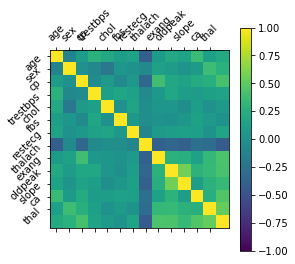

In [ ]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,13), rotation = 45);
plt.yticks(np.arange(0,13), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

## 3. Tiền xử lí dữ liệu

#### (1) Biến đổi dữ liệu (Data Transforms)
Dữ liệu heart-disease-Cleveland là dữ liệu số nên không cần biến đổi dữ liệu

#### (2). Làm sạch dữ liệu (Data Cleaning)

#### **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [ ]:
df_dataset = pd.read_csv(data_path, names = data_names)
df_dataset = pd.read_csv(data_path, names = data_names, na_values='?')
df_dataset['num']=df_dataset['num'].replace(to_replace=2,value=1)
df_dataset['num']=df_dataset['num'].replace(to_replace=3,value=1)
df_dataset['num']=df_dataset['num'].replace(to_replace=4,value=1)
df_clean = df_dataset.copy()
df_clean

has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
n_duplicated = df_clean.duplicated().sum()
df_clean.replace("?", np.nan, inplace = True)
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_clean[df_clean.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_clean[df_clean.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


+ Có giá trị Nan: True


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


+ Số dòng trùng: 0


####  **Xóa dữ liệu trùng nhau**
+ Dữ liệu không có giá trị trùng

#### **Xử lý giá trị rỗng, không hợp lệ**
+ Thay thế giá trị NaN bằng giá trị mean của cột đó

In [ ]:
#Thay thế giá trị NAN bằng giá trị median của cột đó
for a in df_clean:
    median = df_clean[a].median()
    df_clean[a].fillna(median, inplace=True)
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)
Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [ ]:
# Min-Max Normalization
scale_columns = ["age",
              "sex",
              "cp",
              "trestbps",
              "chol",
              "fbs",
              "restecg",
              "thalach",
              "exang",
              "oldpeak",
              "slope",
              "ca",
              "thal",
              "num"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00,1.0
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00,1.0
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00,1.0
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00,1.0


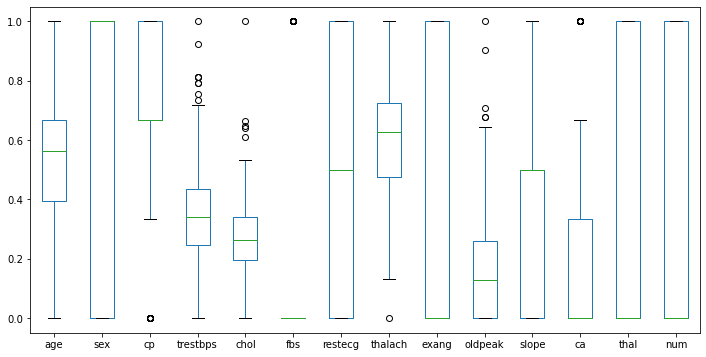

In [ ]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [ ]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,-0.920631
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,1.086212
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,1.086212
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,-0.920631
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,-0.920631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.711131,1.176752,1.086212
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.432877,1.176752,1.086212
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.360873,1.176752,1.086212
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.360873,-0.890238,1.086212


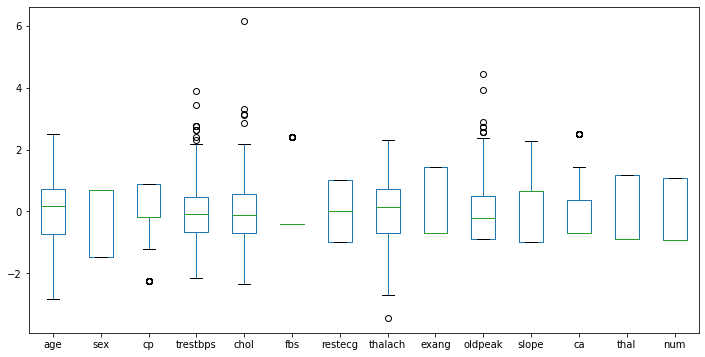

In [ ]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

## Tham số thực nghiệm

In [ ]:
params = {}

params["exps_root"]  = "exps/cleveland-heart"

params["data_split_train"] = 0.7
params["k_fold"] = 10
params["random_state"] = 10

params["data_path"]  = f'{params["exps_root"]}/df_clean_minmax.xlsx'
params["exps_name"]  = "cleveland_heart_minmax"

print("params: ")
for k in params: print(f'+ {k}: {params[k]}')

# cố định random-state để phục hồi lại kết quả thí nghiệm
random.seed(params["random_state"])
os.environ['PYTHONHASHSEED'] = str(params["random_state"])
np.random.seed(params["random_state"])

params: 
+ exps_root: exps/cleveland-heart
+ data_split_train: 0.7
+ k_fold: 10
+ random_state: 10
+ data_path: exps/cleveland-heart/df_clean_minmax.xlsx
+ exps_name: cleveland_heart_minmax


## 4. Dữ liệu kiểm nghiệm (Validation Dataset)
Chúng ta chuẩn bị dữ liệu kiểm nghiệm theo phương pháp hold-out:

+ Tập dữ liệu được chia thành 2 phần train/test với tỉ lệ 7/3
+ Tập train sẽ được dùng để huấn luyện, điều chỉnh tham số với chiến lược:
    + Hold-out (tiếp tục chia 7/3 với train/valid)
    + k-fold (chia thành k phần đều nhau với k-1 phần cho train/1 phần cho valid)
    + Trong đó, train là dùng huấn luyện và valid dùng điều chỉnh tham số
+ Tập test dùng để kiểm nghiệm lại độ hiệu quả của thuật toán sau khi chọn mô hình tối ưu

In [ ]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:,13].astype(np.int)

In [ ]:
print(f'+ x_shape: {X_data.shape}, y_shape: {y_data.shape}')
print(f'+ Input:\n{X_data[:20, :]}')
print(f'+ Output:\n{y_data[:20]}')

+ x_shape: (303, 13), y_shape: (303,)
+ Input:
[[0.70833333 1.         0.         0.48113208 0.24429224 1.
  1.         0.60305344 0.         0.37096774 1.         0.
  0.75      ]
 [0.79166667 1.         1.         0.62264151 0.3652968  0.
  1.         0.28244275 1.         0.24193548 0.5        1.
  0.        ]
 [0.79166667 1.         1.         0.24528302 0.23515982 0.
  1.         0.44274809 1.         0.41935484 0.5        0.66666667
  1.        ]
 [0.16666667 1.         0.66666667 0.33962264 0.28310502 0.
  0.         0.88549618 0.         0.56451613 1.         0.
  0.        ]
 [0.25       0.         0.33333333 0.33962264 0.17808219 0.
  1.         0.77099237 0.         0.22580645 0.         0.
  0.        ]
 [0.5625     1.         0.33333333 0.24528302 0.25114155 0.
  0.         0.81679389 0.         0.12903226 0.         0.
  0.        ]
 [0.6875     0.         1.         0.43396226 0.32420091 0.
  1.         0.67938931 0.         0.58064516 1.         0.66666667
  0.        ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=params["data_split_train"],
                                                    random_state=params["random_state"])

## 5. Lượng giá thuật toán (Evaluate Algorithms)

In [ ]:
kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])
print(f"+ X_train: {len(X_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 212
Fold 0: 
+ train_idx: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  23  25  27  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  43  44  45  48  50  51  53  54  55  56  57  60  62  63  64
  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 128 129 130 131 132 133 134 135 136 137 139 140 141
 142 143 144 145 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 166 167 168 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 185 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 204 205 206 207 208 209 210 211]
+ valid_idx: [ 19  24  26  35  46  47  49  52  58  59  61  68  83 105 127 138 146 165
 169 184 186 203]
+ train / valid: [ 19  24  26  35  46  47  49  52  58  59  61  68  83 105 127 138 146 1

In [ ]:
X_train[[0,2, 10]]

array([[0.5       , 1.        , 0.66666667, 0.33962264, 0.16210046,
        1.        , 1.        , 0.61832061, 0.        , 0.19354839,
        1.        , 0.        , 0.        ],
       [0.5       , 1.        , 1.        , 0.27358491, 0.35616438,
        0.        , 0.        , 0.18320611, 1.        , 0.32258065,
        0.5       , 0.66666667, 1.        ],
       [0.54166667, 1.        , 1.        , 0.35849057, 0.51826484,
        0.        , 0.        , 0.46564885, 1.        , 0.19354839,
        0.5       , 0.33333333, 1.        ]])

In [ ]:
y_train[[0,2,10]]

array([0, 1, 1])

In [ ]:
# Mô hình mặc định (models, results, hyper-parameters)
baseline_models  = {}
baseline_results = {}

# khởi tạo các tham số mặc định
baseline_models['KNN']  = KNeighborsClassifier()

# Huấn luyện từng mô hình cơ sở
for model_name in baseline_models:

    baseline_results[model_name] = []
    print(f'Model [{model_name}]:')

    # Chiến lược chia dữ liệu trên tập X_train
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    # Tách X_train, y_train thành 2 tập train, valid trên từng fold
    # Với mỗi fold, train cho huấn luyện, valid cho lượng giá và điều chỉnh tham số
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
        # Chia 2 tập thành train/valid
        X1_train, y1_train = X_train[train_idx], y_train[train_idx]
        X1_valid, y1_valid = X_train[valid_idx], y_train[valid_idx]


        # Lấy mô hình khởi tạo
        model_clf = sklearn.base.clone(baseline_models[model_name])

        # Huấn luyện mô hình
        model_clf.fit(X1_train, y1_train)

        # Lượng giá mô hình
        y1_pred_valid = model_clf.predict(X1_valid)

        # Tính toán metrics: accuracy
        valid_acc = accuracy_score(y1_valid, y1_pred_valid)

        # Lưu metrics trên từng fold
        baseline_results[model_name].append(valid_acc)

        pass # fold
    # Chúng ta đơn giản sử dụng lệnh bên dưới thay cho khối lệnh k-fold bên trên
    # baseline_results[name] = cross_val_score(model_clf, X_train, y_train, cv = kfold, scoring="accuracy")

    # hiển thị tham số mô hình
    print(f'+ params = {baseline_models[model_name].get_params()}')

    # hiển thị kết quả trên từng fold
    print(f'+ acc = {baseline_results[model_name]}')

    # trung bình kết quả +/ std cho tất cả các fold,
    # std: độ lệch chuẩn=> nếu cùng mean thì độ lệch nào nhỏ hơn thì tốt hơn vì ổn định và tập trung hơn
    s_msg = f'+ mean_acc = {np.mean(baseline_results[model_name]):.6f} +/- {np.std(baseline_results[model_name]):.6f}'
    print(s_msg)
    print()

    # Huấn luyện lại với trên toàn bộ dữ liệu train (re-fit all train_data)
    baseline_models[model_name].fit(X_train, y_train)
    pass # model

Model [KNN]:
+ params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+ acc = [0.7727272727272727, 0.8181818181818182, 0.8571428571428571, 0.8571428571428571, 0.8095238095238095, 0.8571428571428571, 0.7142857142857143, 0.8095238095238095, 0.7619047619047619, 0.7142857142857143]
+ mean_acc = 0.797186 +/- 0.052075



### Baselines

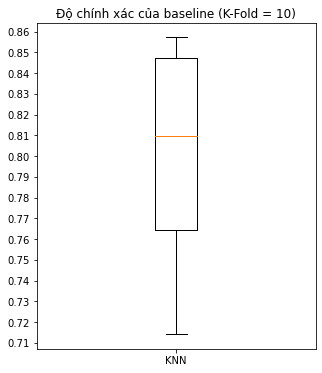

In [ ]:
# In biểu đồ box-plot trên độ chính xác với k-fold
plt.figure(figsize=(5,6))
plt.boxplot(baseline_results.values())
plt.gca().set_xticklabels(baseline_results.keys())
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.title(f'Độ chính xác của baseline (K-Fold = {params["k_fold"]})')
plt.show()

### Tinh chỉnh mô hình (Tunning Models)

In [ ]:
tunning_results = {
    "best_clf"   : {},
    "best_score" : {},
}

tunning_models  = {}
tunning_params  = {}

# khởi tạo các tham số mặc định
tunning_models['KNN']  = KNeighborsClassifier()
tunning_params['KNN']  = {'n_neighbors': [32],
                          'p':[4]}

for model_name in tunning_models:
    model_clf = tunning_models[model_name]

    print(f'Model [{model_name}]:')

    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    grid_clf = GridSearchCV(estimator=model_clf,
                            param_grid=tunning_params[model_name],
                            cv = kfold, scoring="accuracy")
    grid_result = grid_clf.fit(X_train, y_train)

    grid_pred = grid_clf.fit(X_test, y_test)

    # store best model
    tunning_results["best_clf"][model_name] = grid_clf.best_estimator_

    # get search results
    tunning_results["best_score"][model_name] = grid_result.best_score_


    # information
    print(f'+ Best score: {grid_result.best_score_}')
    print(f'+ Best turnning params: {grid_result.best_params_}')
    print(f'+ Best full params: {grid_clf.best_estimator_.get_params()}')
    print()

    pass

Model [KNN]:
+ Best score: 0.8455555555555556
+ Best turnning params: {'n_neighbors': 32, 'p': 4}
+ Best full params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 32, 'p': 4, 'weights': 'uniform'}



Số lượng neighbors tối ưu nhất là 26 với 84.6%


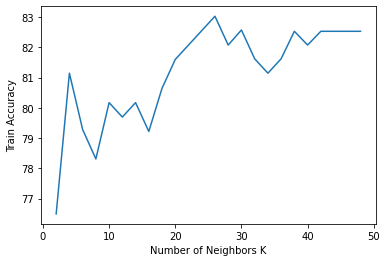

In [ ]:
#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "Số lượng neighbors tối ưu nhất là %d với %0.1f%%" % (optimal_k, (grid_result.best_score_)*100)))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

Số lượng neighbors tối ưu nhất là 32 với 84.6%


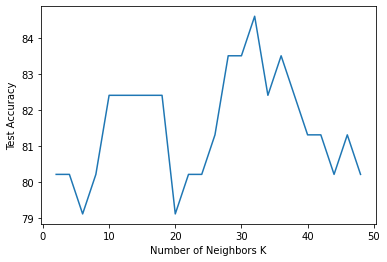

In [ ]:
#Create empty list that will hold cv preds
cv_preds = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))

optimal_k = neighbors[cv_preds.index(max(cv_preds))]
print(( "Số lượng neighbors tối ưu nhất là %d với %0.1f%%" % (optimal_k, (grid_pred.best_score_)*100)))

plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

# 6. Kiểm nghiệm kết quả trên Test (Finalize Model)

Baseline [KNN]
+ acc = 0.835


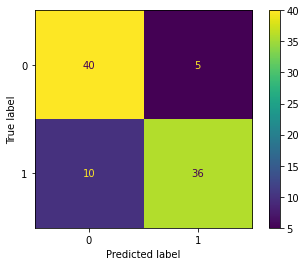

In [ ]:
test_models  = {}
test_scores  = {}

# Kiểm tra kết quả trên tập test (baseline)
for model_name in baseline_models:
    model_clf = baseline_models[model_name]
    y_pred_test = model_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    # information
    print(f'Baseline [{model_name}]')
    print(f'+ acc = {test_acc:.3f}')
    plot_confusion_matrix(model_clf, X_test, y_test)
    plt.show()

**Nhận xét:**
 + Baseline [KNN] là kết quả thực nghiệm chuẩn đoán chính xác 83.5%
     + Trong đó:
         + 40 là số class 0 chính xác từ model
         + 10 là số class 0 chưa chính xác từ model
         + 36 là số class 1 chính xác từ model
         + 5 là số class 1 chưa chính xác từ model

#### Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [ ]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[0.70833333 1.         0.         0.48113208 0.24429224 1.
  1.         0.60305344 0.         0.37096774 1.         0.
  0.75      ]
 [0.79166667 1.         1.         0.62264151 0.3652968  0.
  1.         0.28244275 1.         0.24193548 0.5        1.
  0.        ]
 [0.79166667 1.         1.         0.24528302 0.23515982 0.
  1.         0.44274809 1.         0.41935484 0.5        0.66666667
  1.        ]
 [0.16666667 1.         0.66666667 0.33962264 0.28310502 0.
  0.         0.88549618 0.         0.56451613 1.         0.
  0.        ]
 [0.25       0.         0.33333333 0.33962264 0.17808219 0.
  1.         0.77099237 0.         0.22580645 0.         0.
  0.        ]
 [0.5625     1.         0.33333333 0.24528302 0.25114155 0.
  0.         0.81679389 0.         0.12903226 0.         0.
  0.        ]
 [0.6875     0.         1.         0.43396226 0.32420091 0.
  1.         0.67938931 0.         0.58064516 1.         0.66666667
  0.        ]
 [0.58333333 0.         1.         0.24528302 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.6996699669966997
+ Train: shape=(212, 13)
Input = 
[[0.5        1.         0.66666667 0.33962264 0.16210046 1.
  1.         0.61832061 0.         0.19354839 1.         0.
  0.        ]
 [0.5        1.         1.         0.45283019 0.2283105  0.
  1.         0.30534351 1.         0.         0.         0.
  1.        ]
 [0.5        1.         1.         0.27358491 0.35616438 0.
  0.         0.18320611 1.         0.32258065 0.5        0.66666667
  1.        ]
 [0.52083333 1.         0.66666667 0.29245283 0.33561644 0.
  1.         0.61832061 0.         0.08064516 1.         0.33333333
  0.        ]
 [0.72916667 1.         1.         0.24528302 0.2739726  0.
  1.         0.19083969 1.         0.35483871 1.         0.33333333
  0.        ]]
Output = [0. 0. 1. 0. 1.]
+ Test: shape=(91, 13)
Input = 
[[0.60416667 1.         1.         0.05660377 0.24657534 0.
  0.         0.64885496 0.         0.01612903 0.         0.33333333
  1.        ]
 [0.625      1.         

In [ ]:
# Lưu thông tin
save_dir = "exps/cleveland-heart"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save minmax data
df_clean_minmax.to_excel(f'{save_dir}/df_minmax.xlsx', index =False)

os.listdir(save_dir)

['data.npz', 'df_clean.xlsx', 'df_minmax.xlsx']

In [ ]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [ ]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,0.000000,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.00,1
2,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.00,1
3,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1,0.000000,0.150943,0.315068,0,0.0,0.465649,0,0.193548,0.5,0.000000,1.00,1
299,0.812500,1,1.000000,0.471698,0.152968,1,0.0,0.534351,0,0.548387,0.5,0.666667,1.00,1
300,0.583333,1,1.000000,0.339623,0.011416,0,0.0,0.335878,1,0.193548,0.5,0.333333,1.00,1
301,0.583333,0,0.333333,0.339623,0.251142,0,1.0,0.786260,0,0.000000,0.5,0.333333,0.00,1


In [ ]:
pd.read_excel(f'{save_dir}/df_minmax.xlsx')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,0.000000,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.00,1
2,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.00,1
3,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1,0.000000,0.150943,0.315068,0,0.0,0.465649,0,0.193548,0.5,0.000000,1.00,1
299,0.812500,1,1.000000,0.471698,0.152968,1,0.0,0.534351,0,0.548387,0.5,0.666667,1.00,1
300,0.583333,1,1.000000,0.339623,0.011416,0,0.0,0.335878,1,0.193548,0.5,0.333333,1.00,1
301,0.583333,0,0.333333,0.339623,0.251142,0,1.0,0.786260,0,0.000000,0.5,0.333333,0.00,1


# Kết thúc